#  Defining incoming U 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import seaborn as sns
import xarray as xr

In [2]:
# grid files
grid_file = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
grid = xr.open_dataset(grid_file)

# files for original run with body forcing
state_file_bf = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
ptracers_file_bf = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/ptracersGlob.nc'

state_bf = xr.open_dataset(state_file_bf)
ptracers_bf = xr.open_dataset(ptracers_file_bf)

state_file_bf_n = '/data/kramosmu/results/TracerExperiments/CNTDIFF_n/run38/stateGlob.nc' 
ptracers_file_bf_n = '/data/kramosmu/results/TracerExperiments/CNTDIFF_n/run38/ptracersGlob.nc'

state_nbf = xr.open_dataset(state_file_bf_n)
ptracers_nbf = xr.open_dataset(ptracers_file_bf_n)

state_file_bf_nn = '/data/kramosmu/results/TracerExperiments/CNTDIFF_SR12/run38/stateGlob.nc' 
ptracers_file_bf_nn = '/data/kramosmu/results/TracerExperiments/CNTDIFF_SR12/run38/ptracersGlob.nc'

state_nnbf = xr.open_dataset(state_file_bf_nn)
ptracers_nnbf = xr.open_dataset(ptracers_file_bf_nn)

state_file_ext = '/data/kramosmu/results/TracerExperiments/CNTDIFF_EXT_SHELF/run01/stateGlob.nc' 
ptracers_file_ext = '/data/kramosmu/results/TracerExperiments/CNTDIFF_EXT_SHELF/run01/ptracersGlob.nc'

state_ext = xr.open_dataset(state_file_ext)
ptracers_ext = xr.open_dataset(ptracers_file_ext)

state_file_ext3x = '/data/kramosmu/results/TracerExperiments/CNTDIFF_EXTx3_smallerSHELF/run01/stateGlob.nc' 
ptracers_file_ext3x = '/data/kramosmu/results/TracerExperiments/CNTDIFF_EXTx3_smallerSHELF/run01/ptracersGlob.nc'

state_ext3x = xr.open_dataset(state_file_ext3x)
ptracers_ext3x = xr.open_dataset(ptracers_file_ext3x)


In [3]:
# Find land mask
hFacmasked = np.ma.masked_values(grid.HFacW.data, 0)
MaskC = np.ma.getmask(hFacmasked)


In [12]:
U_in_base = state_bf.U.isel(Xp1=120, Z=slice(16,21),Y=slice(230,251))
U_in_nbase = state_nbf.U.isel(Xp1=120, Z=slice(16,21),Y=slice(230,251))
U_in_nnbase = state_nnbf.U.isel(Xp1=120, Z=slice(16,21),Y=slice(230,251))
U_in_ext = state_ext.U.isel(Xp1=120, Z=slice(16,21),Y=slice(230,251))
U_in_ext3x = state_ext3x.U.isel(Xp1=120, Z=slice(16,21),Y=slice(230,251))

Ubase = state_bf.U.isel(T=slice(6,18),Xp1=120, Z=slice(16,21),Y=slice(230,251)).mean()
Unbase = state_nbf.U.isel(T=slice(6,18),Xp1=120, Z=slice(16,21),Y=slice(230,251)).mean()
Unnbase = state_nnbf.U.isel(T=slice(6,18),Xp1=120, Z=slice(16,21),Y=slice(230,251)).mean()
Uext = state_ext.U.isel(T=slice(6,18),Xp1=120, Z=slice(16,21),Y=slice(230,251)).mean()
Uext3x = state_ext3x.U.isel(T=slice(6,18),Xp1=120, Z=slice(16,21),Y=slice(230,251)).mean()

STDbase = state_bf.U.isel(T=slice(6,18),Xp1=120, Z=slice(16,21),Y=slice(230,251)).std()
STDnbase = state_nbf.U.isel(T=slice(6,18),Xp1=120, Z=slice(16,21),Y=slice(230,251)).std()
STDnnbase = state_nnbf.U.isel(T=slice(6,18),Xp1=120, Z=slice(16,21),Y=slice(230,251)).std()
STDext = state_ext.U.isel(T=slice(6,18),Xp1=120, Z=slice(16,21),Y=slice(230,251)).std()
STDext3x = state_ext3x.U.isel(T=slice(6,18),Xp1=120, Z=slice(16,21),Y=slice(230,251)).std()


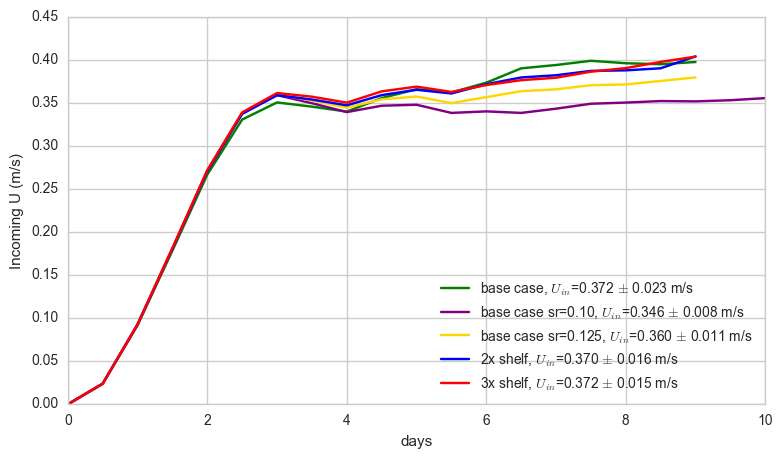

In [15]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(9,5), sharey = True)

ax.plot(np.linspace(0,9,19),np.mean(np.mean(U_in_base,axis=1),axis=1),color='g',
        label='base case, $U_{in}$=%0.3f $\pm$ %0.3f m/s' %(Ubase,STDbase))
ax.plot(np.linspace(0,10,21),np.mean(np.mean(U_in_nbase,axis=1),axis=1),color='purple',
        label='base case sr=0.10, $U_{in}$=%0.3f $\pm$ %0.3f m/s' %(Unbase,STDnbase))
ax.plot(np.linspace(0,9,19),np.mean(np.mean(U_in_nnbase,axis=1),axis=1),color='gold',
        label='base case sr=0.125, $U_{in}$=%0.3f $\pm$ %0.3f m/s' %(Unnbase,STDnnbase))
ax.plot(np.linspace(0,9,19),np.mean(np.mean(U_in_ext,axis=1),axis=1),color='b',
        label='2x shelf, $U_{in}$=%0.3f $\pm$ %0.3f m/s' %(Uext,STDext) )
ax.plot(np.linspace(0,9,19),np.mean(np.mean(U_in_ext3x,axis=1),axis=1),color='r',
        label='3x shelf, $U_{in}$=%0.3f $\pm$ %0.3f m/s' %(Uext3x,STDext3x) )

ax.set_ylabel('Incoming U (m/s)')
ax.set_xlabel('days')
ax.legend(loc=0)